In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

colnames=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']

pd.set_option('display.max_columns', None) # To display all the columns

# 1) Load the data into a single dataframe

In [4]:
def load_data(filepath):
    df = pd.read_table(filepath, names=colnames, skiprows=8)
    df.drop(df.shape[0]-1, inplace=True)
    return df

In [5]:
# rootdir = 'small_dataset_iot23'
rootdir = '../input/small-dataset-iot23'

all_dfs = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        filepath = os.path.join(subdir, file)
        if filepath.endswith('conn.log.labeled'):
            curr_df = load_data(filepath)
            all_dfs.append(curr_df)

for df in all_dfs:
    print(df.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  # Remove the CWD from sys.path while we load stuff.


(4426, 21)
(3209, 21)
(1008748, 21)
(10403, 21)
(1374, 21)
(452, 21)
(130, 21)
(3286, 21)
(237, 21)
(156103, 21)
(23145, 21)


In [6]:
df_merged = pd.concat(all_dfs, ignore_index=True)
print(df_merged.shape)

(1211513, 21)


In [7]:
df_merged.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1547127288.026074,CXY5uG2sSmjJ0grfY2,192.168.1.197,58312.0,104.24.96.120,80.0,tcp,http,3.909013,83,67212,SF,-,-,4380.0,ShADadttFf,54.0,3371.0,50.0,69224.0,- Malicious FileDownload
1,1547127288.018828,Ce3AJzwzXwM3Z1XBg,192.168.1.197,45082.0,104.24.97.120,80.0,tcp,http,4.767024,150,67212,SF,-,-,0.0,ShADadttFf,54.0,2938.0,50.0,69224.0,- Malicious C&C-FileDownload
2,1547127292.857808,CJgnSb3XpbbOcMHKUd,192.168.1.197,58316.0,104.24.96.120,80.0,tcp,-,3.107228,0,0,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,- Benign -
3,1547127287.987598,Cq43w4aHlsW8nXZ3l,192.168.1.197,59357.0,192.168.1.1,53.0,udp,dns,0.029483,58,146,SF,-,-,0.0,Dd,2.0,114.0,2.0,202.0,- Benign -
4,1547127288.023327,C5uLwl2hGy10y9PSr6,192.168.1.197,39686.0,192.168.1.1,53.0,udp,dns,0.001249,58,146,SF,-,-,0.0,Dd,2.0,114.0,2.0,202.0,- Benign -


In [8]:
df_merged['label'].value_counts()

(empty)   Malicious   PartOfAHorizontalPortScan    685062
(empty)   Benign   -                               475992
-   Malicious   DDoS                                14395
-   Benign   -                                      13019
(empty)   Malicious   C&C                            8238
-   Malicious   C&C                                  6720
(empty)   Malicious   Attack                         5962
-   benign   -                                       1956
-   Malicious   PartOfAHorizontalPortScan             122
-   Malicious   C&C-Torii                              30
-   Malicious   C&C-FileDownload                       14
-   Malicious   FileDownload                            3
Name: label, dtype: int64

# 2) Clean the Labels

In [9]:
df_merged.loc[(df_merged.label == '-   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_merged.loc[(df_merged.label == '(empty)   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_merged.loc[(df_merged.label == '-   Malicious   Okiru'), 'label'] = 'Okiru'
df_merged.loc[(df_merged.label == '(empty)   Malicious   Okiru'), 'label'] = 'Okiru'
df_merged.loc[(df_merged.label == '-   Benign   -'), 'label'] = 'Benign'
df_merged.loc[(df_merged.label == '(empty)   Benign   -'), 'label'] = 'Benign'
df_merged.loc[(df_merged.label == '-   benign   -'), 'label'] = 'Benign'
df_merged.loc[(df_merged.label == '-   Malicious   DDoS'), 'label'] = 'DDoS'
df_merged.loc[(df_merged.label == '-   Malicious   C&C'), 'label'] = 'C&C'
df_merged.loc[(df_merged.label == '(empty)   Malicious   C&C'), 'label'] = 'C&C'
df_merged.loc[(df_merged.label == '-   Malicious   Attack'), 'label'] = 'Attack'
df_merged.loc[(df_merged.label == '(empty)   Malicious   Attack'), 'label'] = 'Attack'
df_merged.loc[(df_merged.label == '-   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_merged.loc[(df_merged.label == '(empty)   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_merged.loc[(df_merged.label == '-   Malicious   C&C-FileDownload'), 'label'] = 'C&C-FileDownload'
df_merged.loc[(df_merged.label == '-   Malicious   C&C-Torii'), 'label'] = 'C&C-Torii'
df_merged.loc[(df_merged.label == '-   Malicious   C&C-HeartBeat-FileDownload'), 'label'] = 'C&C-HeartBeat-FileDownload'
df_merged.loc[(df_merged.label == '-   Malicious   FileDownload'), 'label'] = 'FileDownload'
df_merged.loc[(df_merged.label == '-   Malicious   C&C-Mirai'), 'label'] = 'C&C-Mirai'
df_merged.loc[(df_merged.label == '-   Malicious   Okiru-Attack'), 'label'] = 'Okiru-Attack'

In [10]:
df_merged['label'].value_counts()

PartOfAHorizontalPortScan    685184
Benign                       490967
C&C                           14958
DDoS                          14395
Attack                         5962
C&C-Torii                        30
C&C-FileDownload                 14
FileDownload                      3
Name: label, dtype: int64

# 3) Delete unnecessarry columns


In [11]:
# These are the columns which are to be removed as they do not provide any beneficial information:

# 'ts' -> timestamp 
# 'uid' -> unique id of connection
# 'id.orig_h' -> origin IP
# 'id.orig_p' -> origin port ??
# 'id.resp_h' -> destination IP
# 'id.resp_p' -> destination port ??
# 'local_orig' -> if connection originated locally for origin
# 'local_resp' -> if connection originated locally for destination

# non_useful_columns = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp']
non_useful_columns = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp', 'history']

df_merged.drop(non_useful_columns, axis=1, inplace=True)
df_merged.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,tcp,http,3.909013,83,67212,SF,4380.0,54.0,3371.0,50.0,69224.0,FileDownload
1,tcp,http,4.767024,150,67212,SF,0.0,54.0,2938.0,50.0,69224.0,C&C-FileDownload
2,tcp,-,3.107228,0,0,S0,0.0,3.0,180.0,0.0,0.0,Benign
3,udp,dns,0.029483,58,146,SF,0.0,2.0,114.0,2.0,202.0,Benign
4,udp,dns,0.001249,58,146,SF,0.0,2.0,114.0,2.0,202.0,Benign


# 4) Subsample the data
## Class Balancing
### Subsampling -> 50% Benign, 50% Malicious (All malicious combined)

In [12]:
def subsample(df):
    df_benign = df[df['label'] == 'Benign']
    df_malicious = df[df['label'] != 'Benign']
    
    print('Before subsampling: ', df_benign.shape, df_malicious.shape)
    
    df_malicious = df_malicious.sample(len(df_benign), random_state = 0)
    df = pd.concat([df_malicious, df_benign])
    df = df.sample(frac=1, random_state=0)
    
    print('After subsampling: ', df_benign.shape, df_malicious.shape)
    
    return df

In [13]:
df_merged = subsample(df_merged)
print(df_merged.shape)

Before subsampling:  (490967, 12) (720546, 12)
After subsampling:  (490967, 12) (490967, 12)
(981934, 12)


Benign                       490967
PartOfAHorizontalPortScan    466941
C&C                           10133
DDoS                           9791
Attack                         4070
C&C-Torii                        22
C&C-FileDownload                  7
FileDownload                      3
Name: label, dtype: int64


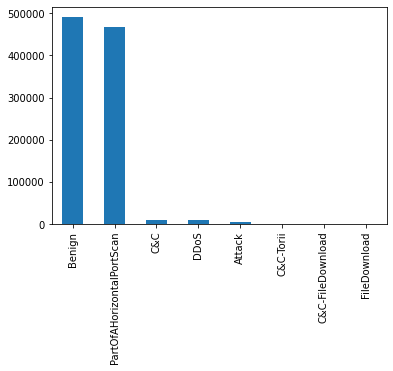

In [14]:
print(df_merged['label'].value_counts())
df_merged['label'].value_counts().plot(kind='bar')
plt.show()

# 5) Handle empty values and do one-hot encoding

In [15]:
# There are some empty values denoted by '-' int the dataframe,
# They need to be replace with NaN

print(df_merged.isna().sum())
print()
df_merged.replace('-', np.nan, inplace=True)
print(df_merged.isna().sum())

proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

proto                 0
service          968856
duration         755727
orig_bytes       755727
resp_bytes       755727
conn_state            0
missed_bytes          0
orig_pkts             0
orig_ip_bytes         0
resp_pkts             0
resp_ip_bytes         0
label                 0
dtype: int64


In [16]:
df_merged['duration'] = df_merged['duration'].str.replace('-','0')
df_merged['orig_bytes'] = df_merged['orig_bytes'].str.replace('-','0')
df_merged['resp_bytes'] = df_merged['resp_bytes'].str.replace('-','0')
df_merged['service'] = df_merged['service'].str.replace('-','0')

In [17]:
df_merged.fillna(-1,inplace=True)

In [18]:
df_merged.isna().sum()

proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
label            0
dtype: int64

In [19]:
# Make 'proto', 'service', 'conn_state', 'history' as One-Hot Encoded
print(df_merged.columns)

def encode(df, column_name):
    dummies = pd.get_dummies(df[[column_name]], dummy_na=True) # Also create a NaN column for NaN values
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([column_name], axis=1)
    return res

# columns_to_encode = ['proto', 'service', 'conn_state', 'history']
columns_to_encode = ['proto', 'service', 'conn_state']

for column in columns_to_encode:
    df_merged = encode(df_merged, column)

print(df_merged.columns)

Index(['proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label'],
      dtype='object')
Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'proto_icmp',
       'proto_tcp', 'proto_udp', 'proto_nan', 'service_-1', 'service_dhcp',
       'service_dns', 'service_http', 'service_irc', 'service_ssh',
       'service_ssl', 'service_nan', 'conn_state_OTH', 'conn_state_REJ',
       'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR',
       'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2',
       'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR',
       'conn_state_nan'],
      dtype='object')


In [20]:
print(df_merged.shape)
df_merged.tail()

(981934, 35)


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,proto_nan,service_-1,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl,service_nan,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,conn_state_nan
798798,2.999036,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1007112,-1,-1,-1,0.0,1.0,40.0,0.0,0.0,Benign,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
621474,-1,-1,-1,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1134456,-1,-1,-1,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1201170,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,DDoS,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Get the list of those columns which contain NaN values and replace NaN values with median
nan_columns = df_merged.columns[df_merged.isna().any()].tolist()
print('Before replacing, the columns containing NaN values:', nan_columns)

for column in nan_columns:
    df_merged[column].fillna(df_merged[column].median(), inplace=True)

nan_columns = df_merged.columns[df_merged.isna().any()].tolist()
print('After replacing, the columns containing NaN values:', nan_columns)

print(df_merged.shape)
df_merged.tail()

Before replacing, the columns containing NaN values: []
After replacing, the columns containing NaN values: []
(981934, 35)


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,proto_nan,service_-1,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl,service_nan,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,conn_state_nan
798798,2.999036,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1007112,-1,-1,-1,0.0,1.0,40.0,0.0,0.0,Benign,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
621474,-1,-1,-1,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1134456,-1,-1,-1,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1201170,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,DDoS,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Remove columns which contain only 0 values
empty_columns = df_merged.columns[(df_merged == 0).all()]
print(empty_columns)
df_merged.drop(empty_columns, axis=1, inplace=True)
print(df_merged.shape)
df_merged.head()

Index(['proto_nan', 'service_nan', 'conn_state_nan'], dtype='object')
(981934, 32)


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,service_-1,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
68055,-1,-1,-1,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
944116,2.999268,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
26548,-1,-1,-1,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
764267,-1,-1,-1,0.0,1.0,40.0,0.0,0.0,Benign,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
821226,2.998795,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [23]:
# Reset index
df_merged.reset_index(drop=True, inplace=True)

# 8) Assign numerical values to output

In [24]:
df_merged.loc[(df_merged.label == 'Benign'), 'label'] = 0
df_merged.loc[(df_merged.label == 'PartOfAHorizontalPortScan'), 'label'] = 1
df_merged.loc[(df_merged.label == 'Attack'), 'label'] = 2
df_merged.loc[(df_merged.label == 'DDoS'), 'label'] = 3
df_merged.loc[(df_merged.label == 'C&C'), 'label'] = 4
df_merged.loc[(df_merged.label == 'C&C-Torii'), 'label'] = 5
df_merged.loc[(df_merged.label == 'FileDownload'), 'label'] = 6
df_merged.loc[(df_merged.label == 'C&C-FileDownload'), 'label'] = 7

In [25]:
df_merged.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,service_-1,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl,conn_state_OTH,conn_state_REJ,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,-1,-1,-1,0.0,1.0,60.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2.999268,0,0,0.0,3.0,180.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-1,-1,-1,0.0,1.0,60.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-1,-1,-1,0.0,1.0,40.0,0.0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.998795,0,0,0.0,3.0,180.0,0.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [26]:
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
X = df_merged.drop(['label'], axis=1)
y = df_merged['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Encode the labels in y_train
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [31]:
# Encode the labels in y_test using the same label encoder
y_test = le.transform(y_test)

# Random Forest Model

In [116]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [117]:
# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473284891566143


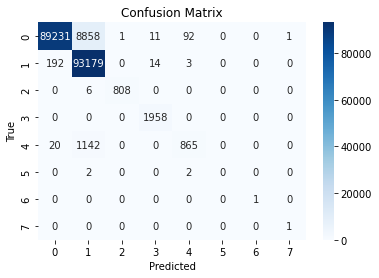

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Decision Tree classifier

In [119]:
# Create a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [120]:
# Fit the classifier to the data
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [121]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.947129901673736


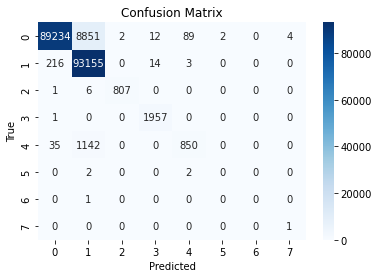

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# CNN Model

In [123]:
# Reshape the data for input to a CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [124]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
24549/24549 [==============================] - 172s 7ms/step - loss: -43344308.0000 - accuracy: 0.8860 - val_loss: -193334576.0000 - val_accuracy: 0.9256
Epoch 2/20
24549/24549 [==============================] - 171s 7ms/step - loss: -845784128.0000 - accuracy: 0.8804 - val_loss: -2109196032.0000 - val_accuracy: 0.9256
Epoch 3/20
24549/24549 [==============================] - 178s 7ms/step - loss: -4834544640.0000 - accuracy: 0.8819 - val_loss: -9210829824.0000 - val_accuracy: 0.9256
Epoch 4/20
24549/24549 [==============================] - 172s 7ms/step - loss: -16055202816.0000 - accuracy: 0.8812 - val_loss: -26861084672.0000 - val_accuracy: 0.9256
Epoch 5/20
24549/24549 [==============================] - 183s 7ms/step - loss: -40853123072.0000 - accuracy: 0.8813 - val_loss: -62630166528.0000 - val_accuracy: 0.9256
Epoch 6/20
24549/24549 [==============================] - 176s 7ms/step - loss: -88008351744.0000 - accuracy: 0.8814 - val_loss: -126211186688.0000 - val_accura

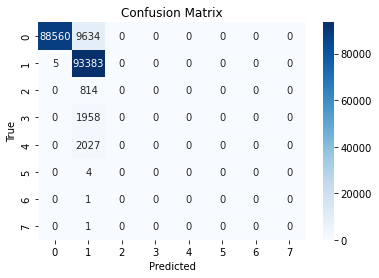

In [138]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add axis labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# RNN Model

In [130]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Set the maximum number of features
max_features = len(X.columns)

# Build the model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(1, max_features), activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

# Train the model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
test_loss, test_acc = rnn_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
19639/19639 [==============================] - 97s 5ms/step - loss: -36830.8008 - accuracy: 0.9136 - val_loss: -129308.0391 - val_accuracy: 0.9259
Epoch 2/50
19639/19639 [==============================] - 98s 5ms/step - loss: -408060.5312 - accuracy: 0.9137 - val_loss: -822970.5000 - val_accuracy: 0.9258
Epoch 3/50
19639/19639 [==============================] - 101s 5ms/step - loss: -1572121.1250 - accuracy: 0.9133 - val_loss: -2545272.5000 - val_accuracy: 0.9259
Epoch 4/50
19639/19639 [==============================] - 98s 5ms/step - loss: -3977885.2500 - accuracy: 0.9138 - val_loss: -5740229.0000 - val_accuracy: 0.9259
Epoch 5/50
19639/19639 [==============================] - 97s 5ms/step - loss: -8008136.0000 - accuracy: 0.9137 - val_loss: -10768581.0000 - val_accuracy: 0.9259
Epoch 6/50
19639/19639 [==============================] - 97s 5ms/step - loss: -14086777.0000 - accuracy: 0.9137 - val_loss: -18122874.0000 - val_accuracy: 0.9259
Epoch 7/50
19639/19639 [===========

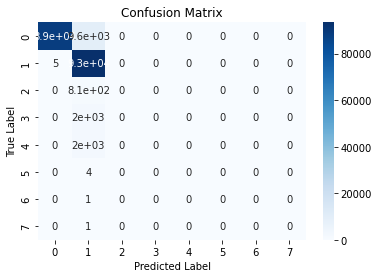

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = rnn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Saving The Models

In [127]:
## saving Random Forest Model
import pickle

# Save the model to a file
with open('RandomForest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [128]:
## saving Decision Tree Model
import pickle

# Save the model to a file
with open('DecisionTree_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

In [129]:
# Saveing CNN model as H5 file
model.save('cnn_model.h5')

In [131]:
# Saveing RNN model as H5 file
rnn_model.save('rnn_model.h5')